In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', 500)

In [2]:
df1 = pd.read_csv('functions_and_aspects_v2.csv', converters = {'asin': str, 'unixReviewTime': str})
df2 = pd.read_csv('meta_and_review_sentiment_delivery_customer_package_price_updated.csv',converters = {'asin': str, 'unixReviewTime': str})

In [3]:
df1['map_id'] = df1['asin'] + df1['unixReviewTime'] + df1['reviewerID']
df2['map_id'] = df2['asin'] + df2['unixReviewTime'] + df2['reviewerID']

In [4]:
package_sentiment = ['polarity_score', 'neutral_score', 'negative_score',
       'positive_score', 'neu_delivery', 'neg_delivery', 'pos_delivery',
       'neu_shipment', 'neg_shipment', 'pos_shipment', 'review_len',
       'neu_return_policy', 'neg_return_policy', 'pos_return_policy',
       'neu_exchange', 'neg_exchange', 'pos_exchange', 'neu_service',
       'neg_service', 'pos_service', 'neu_support', 'neg_support',
       'pos_support', 'neu_pack', 'neg_pack', 'pos_pack', 'neu_package',
       'neg_package', 'pos_package', 'neu_price', 'neg_price', 'pos_price']

In [5]:
for i in package_sentiment:
    df2 = df2.rename(columns = {i: i+'_package'})

In [6]:
df2 = df2[['polarity_score_package', 'neutral_score_package',
       'negative_score_package', 'positive_score_package',
       'neu_delivery_package', 'neg_delivery_package', 'pos_delivery_package',
       'neu_shipment_package', 'neg_shipment_package', 'pos_shipment_package',
       'review_len_package', 'neu_return_policy_package',
       'neg_return_policy_package', 'pos_return_policy_package',
       'neu_exchange_package', 'neg_exchange_package', 'pos_exchange_package',
       'neu_service_package', 'neg_service_package', 'pos_service_package',
       'neu_support_package', 'neg_support_package', 'pos_support_package',
       'neu_pack_package', 'neg_pack_package', 'pos_pack_package',
       'neu_package_package', 'neg_package_package', 'pos_package_package',
       'neu_price_package', 'neg_price_package', 'pos_price_package',
       'map_id']]

In [7]:
df = pd.merge(df1, df2, how = 'inner', on = 'map_id')

In [8]:
df['helpful_senti_package'] = df['helpful_overall'] * df['polarity_score_package']

In [9]:
df[['negative_score_package','neg_delivery_package', 'neg_shipment_package', 'neg_return_policy_package',
    'neg_exchange_package',  'neg_service_package',  'neg_support_package',  'neg_pack_package',
    'neg_package_package', 'neg_price_package']] = df[['negative_score_package','neg_delivery_package', 'neg_shipment_package', 'neg_return_policy_package',
    'neg_exchange_package',  'neg_service_package',  'neg_support_package',  'neg_pack_package',
    'neg_package_package', 'neg_price_package']] *-1

In [10]:
# function to groupby the data
def group_by_prod_1 (df):
    to_average = ['net_len', 'helpful_overall', 'helpful_positive','t_func_cleansing',
              'r_func_cleansing', 't_func_dandruff','r_func_dandruff', 't_func_growth',
              'r_func_growth', 't_func_moisture', 'r_func_moisture', 't_func_repair',
              'r_func_repair', 't_func_color','r_func_color', 'satisfactory', 'temp', 
              'pos_delivery', 'neg_delivery', 'polarity_delivery', 'pos_price', 'neg_price',
              'polarity_price', 'pos_service', 'neg_service', 'polarity_service', 
              'pos_package', 'neg_package', 'polarity_package', 'salesRank',
              'polarity_score_package', 'negative_score_package','positive_score_package',
              'neg_delivery_package', 'pos_delivery_package', 'neg_shipment_package',
              'pos_shipment_package', 'neg_return_policy_package','pos_return_policy_package', 
              'neg_exchange_package', 'pos_exchange_package',  'neg_service_package',
              'pos_service_package',  'neg_support_package', 'pos_support_package', 
              'neg_pack_package', 'pos_pack_package', 'neg_package_package', 
              'pos_package_package','neg_price_package', 'pos_price_package', 'helpful_senti_package']
    for i in to_average:
        df[i + "_avg"] = df[i].mean()
    df['numbers_of_reviews'] = df['title'].count()
    df['numbers_of_reviewers'] = df['reviewerID'].count()
    # other calculations to add
    return df

In [11]:
# function to groupby the data
def group_by_prod_2 (df):
    to_average = ['net_len', 'helpful_overall', 'helpful_positive','t_func_cleansing',
              'r_func_cleansing', 't_func_dandruff','r_func_dandruff', 't_func_growth',
              'r_func_growth', 't_func_moisture', 'r_func_moisture', 't_func_repair',
              'r_func_repair', 't_func_color','r_func_color', 'satisfactory', 'temp','helpful_senti_package', 'salesRank',]
    
    to_average_without0 = ['pos_delivery', 'neg_delivery', 'polarity_delivery', 'pos_price', 'neg_price',
              'polarity_price', 'pos_service', 'neg_service', 'polarity_service', 
              'pos_package', 'neg_package', 'polarity_package', 
              'polarity_score_package', 'negative_score_package','positive_score_package',
              'neg_delivery_package', 'pos_delivery_package', 'neg_shipment_package',
              'pos_shipment_package', 'neg_return_policy_package','pos_return_policy_package', 
              'neg_exchange_package', 'pos_exchange_package',  'neg_service_package',
              'pos_service_package',  'neg_support_package', 'pos_support_package', 
              'neg_pack_package', 'pos_pack_package', 'neg_package_package', 
              'pos_package_package','neg_price_package', 'pos_price_package', ]

    for i in to_average:
        df[i + "_avg"] = df[i].mean()
    for i in to_average_without0:
        df[i + "_avg"] = df[i][df[i]>0].mean()

    df['numbers_of_reviews'] = df['title'].count()
    df['numbers_of_reviewers'] = df['reviewerID'].count()
    
    return df

In [12]:
prod1 = df.groupby('asin').apply(group_by_prod_1)
prod2 = df.groupby('asin').apply(group_by_prod_2)

In [13]:
a = prod1.copy()
b = prod2.copy()

In [14]:
prod1 = prod1.drop_duplicates(subset = 'asin')
prod2 = prod2.drop_duplicates(subset = 'asin')

In [15]:
prod1 = prod1.drop(columns = ['net_len', 'helpful_overall', 'helpful_positive','t_func_cleansing',
              'r_func_cleansing', 't_func_dandruff','r_func_dandruff', 't_func_growth',
              'r_func_growth', 't_func_moisture', 'r_func_moisture', 't_func_repair',
              'r_func_repair', 't_func_color','r_func_color', 'satisfactory', 'temp', 
              'pos_delivery', 'neg_delivery', 'polarity_delivery', 'pos_price', 'neg_price',
              'polarity_price', 'pos_service', 'neg_service', 'polarity_service', 
              'pos_package', 'neg_package', 'polarity_package', 'polarity_score_package', 'neutral_score_package',
       'negative_score_package', 'positive_score_package',
       'neu_delivery_package', 'neg_delivery_package', 'pos_delivery_package',
       'neu_shipment_package', 'neg_shipment_package', 'pos_shipment_package',
       'review_len_package', 'neu_return_policy_package',
       'neg_return_policy_package', 'pos_return_policy_package',
       'neu_exchange_package', 'neg_exchange_package', 'pos_exchange_package',
       'neu_service_package', 'neg_service_package', 'pos_service_package',
       'neu_support_package', 'neg_support_package', 'pos_support_package',
       'neu_pack_package', 'neg_pack_package', 'pos_pack_package',
       'neu_package_package', 'neg_package_package', 'pos_package_package',
       'neu_price_package', 'neg_price_package', 'pos_price_package',
       'map_id', 'net','neu_delivery','neu_price','neu_service','neu_package','helpful_senti_package','Unnamed: 0'])

prod1 = prod2.drop(columns = ['net_len', 'helpful_overall', 'helpful_positive','t_func_cleansing',
              'r_func_cleansing', 't_func_dandruff','r_func_dandruff', 't_func_growth',
              'r_func_growth', 't_func_moisture', 'r_func_moisture', 't_func_repair',
              'r_func_repair', 't_func_color','r_func_color', 'satisfactory', 'temp', 
              'pos_delivery', 'neg_delivery', 'polarity_delivery', 'pos_price', 'neg_price',
              'polarity_price', 'pos_service', 'neg_service', 'polarity_service', 
              'pos_package', 'neg_package', 'polarity_package', 'polarity_score_package', 'neutral_score_package',
       'negative_score_package', 'positive_score_package',
       'neu_delivery_package', 'neg_delivery_package', 'pos_delivery_package',
       'neu_shipment_package', 'neg_shipment_package', 'pos_shipment_package',
       'review_len_package', 'neu_return_policy_package',
       'neg_return_policy_package', 'pos_return_policy_package',
       'neu_exchange_package', 'neg_exchange_package', 'pos_exchange_package',
       'neu_service_package', 'neg_service_package', 'pos_service_package',
       'neu_support_package', 'neg_support_package', 'pos_support_package',
       'neu_pack_package', 'neg_pack_package', 'pos_pack_package',
       'neu_package_package', 'neg_package_package', 'pos_package_package',
       'neu_price_package', 'neg_price_package', 'pos_price_package',
       'map_id', 'net','neu_delivery','neu_price','neu_service','neu_package','helpful_senti_package','Unnamed: 0'])

In [16]:
# only analyze product with more than 2 reviews
data1 = prod1.loc[prod1['numbers_of_reviews']>=3]
# remove product with 0 average sales ranks
data1 = data1.loc[data1['salesRank_avg']!=0]
# re-rank the sales ranks
data1['rank'] = data1['salesRank_avg'].rank()
data1 = data1.fillna(0)

# only analyze product with more than 2 reviews
data2 = prod2.loc[prod2['numbers_of_reviews']>=3]
# remove product with 0 average sales ranks
data2 = data2.loc[data2['salesRank_avg']!=0]
# re-rank the sales ranks
data2['rank'] = data2['salesRank_avg'].rank()
data2 = data2.fillna(0)

In [17]:
# brand
big_brand = data1['brand'].value_counts().index[1:20]
data1['brand'] = np.where(data1['brand'].isin(big_brand), data1['brand'], 'other')
dummy = pd.get_dummies(data1['brand'],drop_first=False,prefix='brand')
data1 = pd.concat([data1, dummy], axis = 1)
data1.drop('brand', axis = 1, inplace = True)

In [18]:
# brand
big_brand = data2['brand'].value_counts().index[1:20]
data2['brand'] = np.where(data2['brand'].isin(big_brand), data2['brand'], 'other')
dummy = pd.get_dummies(data2['brand'],drop_first=False,prefix='brand')
data2 = pd.concat([data2, dummy], axis = 1)
data2.drop('brand', axis = 1, inplace = True)

In [19]:
data1['class'] = np.where(data1['rank']<=round((0.1*len(data1)), 0), 'top_class', 'middle_class')
data1['class'] = np.where(data1['rank']>=round((0.4*len(data1)), 0), 'bottom_class', data1['class'])

data2['class'] = np.where(data2['rank']<=round((0.1*len(data2)), 0), 'top_class', 'middle_class')
data2['class'] = np.where(data2['rank']>=round((0.4*len(data2)), 0), 'bottom_class', data2['class'])

In [79]:
data2['class'].value_counts()

bottom_class    3620
middle_class    1809
top_class        602
Name: class, dtype: int64

In [20]:
X_1_1 = data1.copy().drop(columns = ['salesRank','asin','salesRank_avg', 
                                'review', 'overall', 'helpful', 'summary', 'unixReviewTime',
                                'reviewTime', 'reviewerID', 'title','rank','numbers_of_reviews',
                               'numbers_of_reviewers', 'helpful_senti_package_avg',
                               'salesRank_avg', 'pos_delivery_avg', 'neg_delivery_avg',
                               'polarity_delivery_avg', 'pos_price_avg', 'neg_price_avg',
                               'polarity_price_avg', 'pos_service_avg', 'neg_service_avg',
                               'polarity_service_avg','class'])

X_1_2 = data1.copy().drop(columns = ['salesRank', 'asin','salesRank_avg', 
                                'review', 'overall', 'helpful', 'summary', 'unixReviewTime',
                                'reviewTime', 'reviewerID', 'title','rank','numbers_of_reviews',
                               'numbers_of_reviewers', 'pos_package_avg', 'neg_package_avg',
                               'polarity_package_avg', 'polarity_score_package_avg',
                               'negative_score_package_avg', 'positive_score_package_avg',
                               'neg_delivery_package_avg', 'pos_delivery_package_avg',
                               'neg_shipment_package_avg', 'pos_shipment_package_avg',
                               'neg_return_policy_package_avg', 'pos_return_policy_package_avg',
                               'neg_exchange_package_avg', 'pos_exchange_package_avg',
                               'neg_service_package_avg', 'pos_service_package_avg',
                               'neg_support_package_avg', 'pos_support_package_avg',
                               'neg_pack_package_avg', 'pos_pack_package_avg',
                               'neg_package_package_avg', 'pos_package_package_avg',
                               'neg_price_package_avg', 'pos_price_package_avg','class'])

X_1_3 = data1.copy().drop(columns = ['salesRank', 'asin','salesRank_avg', 
                                'review', 'overall', 'helpful', 'summary', 'unixReviewTime',
                                'reviewTime', 'reviewerID', 'title','rank','numbers_of_reviews',
                               'numbers_of_reviewers','class'])

y_1 = data1.copy()['class']

In [21]:
le = LabelEncoder()
y_1 = le.fit_transform(y_1)

In [81]:
a = pd.DataFrame(y_1)

In [22]:
X_1_1_train, X_1_1_test, y_1_train, y_1_test = train_test_split(X_1_1, y_1, test_size = 0.3, random_state = 1)
X_1_2_train, X_1_2_test, y_1_train, y_1_test = train_test_split(X_1_2, y_1, test_size = 0.3, random_state = 1)
X_1_3_train, X_1_3_test, y_1_train, y_1_test = train_test_split(X_1_3, y_1, test_size = 0.3, random_state = 1)

In [23]:
X_2_1 = data2.copy().drop(columns = ['salesRank', 'asin','salesRank_avg', 'net', 'Unnamed: 0','map_id',
                                'review', 'overall', 'helpful', 'summary', 'unixReviewTime',
                                'reviewTime', 'reviewerID', 'title','rank','numbers_of_reviews',
                               'numbers_of_reviewers', 'helpful_senti_package_avg',
                               'salesRank_avg', 'pos_delivery_avg', 'neg_delivery_avg',
                               'polarity_delivery_avg', 'pos_price_avg', 'neg_price_avg',
                               'polarity_price_avg', 'pos_service_avg', 'neg_service_avg',
                               'polarity_service_avg','class'])

X_2_2 = data2.copy().drop(columns = ['salesRank', 'asin','salesRank_avg', 'net', 'Unnamed: 0','map_id',
                                'review', 'overall', 'helpful', 'summary', 'unixReviewTime',
                                'reviewTime', 'reviewerID', 'title','rank','numbers_of_reviews',
                               'numbers_of_reviewers', 'pos_package_avg', 'neg_package_avg',
                               'polarity_package_avg', 'polarity_score_package_avg',
                               'negative_score_package_avg', 'positive_score_package_avg',
                               'neg_delivery_package_avg', 'pos_delivery_package_avg',
                               'neg_shipment_package_avg', 'pos_shipment_package_avg',
                               'neg_return_policy_package_avg', 'pos_return_policy_package_avg',
                               'neg_exchange_package_avg', 'pos_exchange_package_avg',
                               'neg_service_package_avg', 'pos_service_package_avg',
                               'neg_support_package_avg', 'pos_support_package_avg',
                               'neg_pack_package_avg', 'pos_pack_package_avg',
                               'neg_package_package_avg', 'pos_package_package_avg',
                               'neg_price_package_avg', 'pos_price_package_avg','class'])

X_2_3 = data2.copy().drop(columns = ['salesRank', 'asin','salesRank_avg', 'net', 'Unnamed: 0','map_id',
                                'review', 'overall', 'helpful', 'summary', 'unixReviewTime',
                                'reviewTime', 'reviewerID', 'title','rank','numbers_of_reviews',
                               'numbers_of_reviewers','class'])

y_2 = data2.copy()['class']

In [24]:
le = LabelEncoder()
y_2 = le.fit_transform(y_2)

In [25]:
X_2_1_train, X_2_1_test, y_2_train, y_2_test = train_test_split(X_2_1, y_2, test_size = 0.3, random_state = 1)
X_2_2_train, X_2_2_test, y_2_train, y_2_test = train_test_split(X_2_2, y_2, test_size = 0.3, random_state = 1)
X_2_3_train, X_2_3_test, y_2_train, y_2_test = train_test_split(X_2_3, y_2, test_size = 0.3, random_state = 1)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [108]:
rf = RandomForestClassifier()
xgb = XGBClassifier()
svc = SVC()

In [109]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [110]:
pipe = Pipeline ([('model',rf)])

In [183]:
params = [{
            'model': [rf],
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [5,8],
            'model__min_samples_leaf': [10, 50, 100]
          },
         {
            'model': [xgb],
            'model__eta': [0.05, 0.1, 0.2],
            'model__max_depth': [7,8,9],
            'model__n_estimators': [150,200,300],
         }
]

In [184]:
gs1 = GridSearchCV(pipe, params, n_jobs = -1, cv = 5)
gs1.fit(X_1_1_train, y_1_train)

C:\Users\zhao.d.5\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:42:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(max_depth=5,
                                                               min_samples_leaf=10,
                                                               n_estimators=50))]),
             n_jobs=-1,
             param_grid=[{'model': [RandomForestClassifier(max_depth=5,
                                                           min_samples_leaf=10,
                                                           n_estimators=50)],
                          'model__max_depth': [5, 8],
                          'model__min_samples_leaf': [10, 50, 100],
                          'model__n_estimators': [50, 100, 200]},
                         {'model': [XGBClass...
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_con

In [185]:
gs2 = GridSearchCV(pipe, params, n_jobs = -1, cv = 5)
gs2.fit(X_1_2_train, y_1_train)

C:\Users\zhao.d.5\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:45:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(max_depth=5,
                                                               min_samples_leaf=10,
                                                               n_estimators=50))]),
             n_jobs=-1,
             param_grid=[{'model': [RandomForestClassifier(max_depth=5,
                                                           min_samples_leaf=10,
                                                           n_estimators=50)],
                          'model__max_depth': [5, 8],
                          'model__min_samples_leaf': [10, 50, 100],
                          'model__n_estimators': [50, 100, 200]},
                         {'model': [XGBClass...
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_con

In [186]:
gs3 = GridSearchCV(pipe, params, n_jobs = -1, cv = 5)
gs3.fit(X_1_3_train, y_1_train)

C:\Users\zhao.d.5\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:49:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(max_depth=5,
                                                               min_samples_leaf=10,
                                                               n_estimators=50))]),
             n_jobs=-1,
             param_grid=[{'model': [RandomForestClassifier(max_depth=5,
                                                           min_samples_leaf=10,
                                                           n_estimators=50)],
                          'model__max_depth': [5, 8],
                          'model__min_samples_leaf': [10, 50, 100],
                          'model__n_estimators': [50, 100, 200]},
                         {'model': [XGBClass...
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_con

In [187]:
gs4 = GridSearchCV(pipe, params, n_jobs = -1, cv = 5)
gs4.fit(X_2_1_train, y_2_train)

C:\Users\zhao.d.5\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:55:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(max_depth=5,
                                                               min_samples_leaf=10,
                                                               n_estimators=50))]),
             n_jobs=-1,
             param_grid=[{'model': [RandomForestClassifier(max_depth=5,
                                                           min_samples_leaf=10,
                                                           n_estimators=50)],
                          'model__max_depth': [5, 8],
                          'model__min_samples_leaf': [10, 50, 100],
                          'model__n_estimators': [50, 100, 200]},
                         {'model': [XGBClass...
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_con

In [188]:
gs5 = GridSearchCV(pipe, params, n_jobs = -1, cv = 5)
gs5.fit(X_2_2_train, y_2_train)

C:\Users\zhao.d.5\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:01:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(max_depth=5,
                                                               min_samples_leaf=10,
                                                               n_estimators=50))]),
             n_jobs=-1,
             param_grid=[{'model': [RandomForestClassifier(max_depth=5,
                                                           min_samples_leaf=10,
                                                           n_estimators=50)],
                          'model__max_depth': [5, 8],
                          'model__min_samples_leaf': [10, 50, 100],
                          'model__n_estimators': [50, 100, 200]},
                         {'model': [XGBClass...
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_con

In [189]:
gs6 = GridSearchCV(pipe, params, n_jobs = -1, cv = 5)
gs6.fit(X_2_3_train, y_2_train)

C:\Users\zhao.d.5\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:08:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(max_depth=5,
                                                               min_samples_leaf=10,
                                                               n_estimators=50))]),
             n_jobs=-1,
             param_grid=[{'model': [RandomForestClassifier(max_depth=5,
                                                           min_samples_leaf=10,
                                                           n_estimators=50)],
                          'model__max_depth': [5, 8],
                          'model__min_samples_leaf': [10, 50, 100],
                          'model__n_estimators': [50, 100, 200]},
                         {'model': [XGBClass...
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_con

In [27]:
import joblib

In [28]:
# gs1 = joblib.load('gs1.pkl')
# gs2 = joblib.load('gs2.pkl')
# gs3 = joblib.load('gs3.pkl')
# gs4 = joblib.load('gs4.pkl')
# gs5 = joblib.load('gs5.pkl')
# gs6 = joblib.load('gs6.pkl')

In [37]:
y_pred1 = gs1.predict (X_1_1_test)
y_pred2 = gs2.predict (X_1_2_test)
y_pred3 = gs3.predict (X_1_3_test)
y_pred4 = gs4.predict (X_2_1_test)
y_pred5 = gs5.predict (X_2_2_test)
y_pred6 = gs6.predict (X_2_3_test)

In [38]:
print (gs1.best_params_, gs1.best_score_)
print (gs2.best_params_, gs2.best_score_)
print (gs3.best_params_, gs3.best_score_)
print (gs4.best_params_, gs4.best_score_)
print (gs5.best_params_, gs5.best_score_)
print (gs6.best_params_, gs6.best_score_)

{'model': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, eta=0.1, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=7,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None), 'model__eta': 0.05, 'model__max_depth': 7, 'model__n_estimators': 150} 0.6569586920553016
{'model': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, eta=0.1, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learni

In [67]:
# print(classification_report(y_1_test, y_pred1))
# print(classification_report(y_1_test, y_pred2))
a = classification_report(y_1_test, y_pred3)
# print(classification_report(y_2_test, y_pred4))
# print(classification_report(y_2_test, y_pred5))
# print(classification_report(y_2_test, y_pred6))

In [72]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_1_test, y_pred3)

<AxesSubplot:>

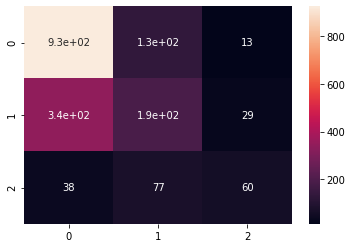

In [78]:
import seaborn as sns
# sns.heatmap(cf_matrix, annot=True)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
#plt.savefig('confusion', dpi = 300)

In [70]:
print(a)

              precision    recall  f1-score   support

           0       0.71      0.86      0.78      1073
           1       0.47      0.34      0.39       562
           2       0.59      0.34      0.43       175

    accuracy                           0.65      1810
   macro avg       0.59      0.51      0.54      1810
weighted avg       0.62      0.65      0.63      1810



In [56]:
final_model = gs3.best_params_['model']
final_model.fit(X_1_3, y_1)
fi = pd.DataFrame({'feature': X_1_3.columns,
               'importance':final_model.feature_importances_}).sort_values(by='importance',
                                                                        ascending=False).reset_index()

C:\Users\zhao.d.5\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:54:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [58]:
fi.head(n = 10)

,index,feature,importance
0,51,pos_price_package_avg,0.038706
1,23,neg_price_avg,0.031758
2,13,r_func_repair_avg,0.031223
3,24,polarity_price_avg,0.023739
4,42,neg_service_package_avg,0.022896
5,19,pos_delivery_avg,0.019897
6,5,r_func_cleansing_avg,0.019210
7,7,r_func_dandruff_avg,0.018902
8,37,pos_shipment_package_avg,0.017978
9,27,polarity_service_avg,0.017358


In [39]:
y_1_cat_train = pd.get_dummies(pd.Series(y_1_train))
y_1_cat_test = pd.get_dummies(pd.Series(y_1_test))

In [40]:
y_2_cat_train = pd.get_dummies(pd.Series(y_2_train))
y_2_cat_test = pd.get_dummies(pd.Series(y_2_test))

In [41]:
import math
from scipy.stats import randint as sp_randint
from keras.layers import Dropout
from keras import models
from keras import layers
import keras
from sklearn.metrics import mean_squared_error
def nn(dropout, lr, l2, X_train, y_train):
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    # network.add(layers.Dense(units=16, activation="relu", input_shape=(50,)))
    network.add(Dropout(dropout, input_shape=(X_train.shape[1],)))
    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=62, activation="relu"))
    
    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=32, activation="relu"))
    
    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation="relu"))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=3, activation="softmax"))

    opt = keras.optimizers.RMSprop(learning_rate = lr,decay = l2)
    # Compile neural network
    network.compile(loss="categorical_crossentropy", 
        optimizer=opt, # Root Mean Square Propagation
        metrics=["accuracy"]) # Accuracy performance metric
    # Train neural network
    history = network.fit(X_train, # Features
                      y_train, # Target vector
                      epochs=100, # Number of epochs
                      verbose=0, # Not print description after each epoch
                      batch_size=100, # Number of observations per batch
                         ) # Test data
    # make a prediction
    #yhat = network.predict(test_X)

    # calculate RMSE
#     rmse = np.sqrt(mean_squared_error(test_y_cat, yhat))
    #rmse = 0
    return history, network

In [42]:
history1, network1 = nn(0.2, 0.01, 0.01, X_1_1_train, y_1_cat_train)
history2, network2 = nn(0.2, 0.01, 0.01, X_1_2_train, y_1_cat_train)
history3, network3 = nn(0.2, 0.01, 0.01, X_1_3_train, y_1_cat_train)
history4, network4 = nn(0.2, 0.01, 0.01, X_2_1_train, y_2_cat_train)
history5, network5 = nn(0.2, 0.01, 0.01, X_2_2_train, y_2_cat_train)
history6, network6 = nn(0.2, 0.01, 0.01, X_2_3_train, y_2_cat_train)

In [43]:
from sklearn.metrics import classification_report

In [53]:
nn_pre = network1.predict(X_1_1_test)
nn_pre = np.argmax(nn_pre, axis = 1) 
print(classification_report(y_1_test, nn_pre))

nn_pre = network2.predict(X_1_2_test)
nn_pre = np.argmax(nn_pre, axis = 1) 
print(classification_report(y_1_test, nn_pre))

nn_pre = network3.predict(X_1_3_test)
nn_pre = np.argmax(nn_pre, axis = 1) 
print(classification_report(y_1_test, nn_pre))

nn_pre = network4.predict(X_2_1_test)
nn_pre = np.argmax(nn_pre, axis = 1) 
print(classification_report(y_2_test, nn_pre))

nn_pre = network5.predict(X_2_2_test)
nn_pre = np.argmax(nn_pre, axis = 1) 
print(classification_report(y_2_test, nn_pre))

nn_pre = network6.predict(X_2_3_test)
nn_pre = np.argmax(nn_pre, axis = 1) 
print(classification_report(y_2_test, nn_pre))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75      1073
           1       0.41      0.23      0.30       562
           2       0.49      0.37      0.42       175

    accuracy                           0.61      1810
   macro avg       0.52      0.48      0.49      1810
weighted avg       0.57      0.61      0.58      1810

              precision    recall  f1-score   support

           0       0.67      0.86      0.76      1073
           1       0.44      0.27      0.34       562
           2       0.54      0.27      0.36       175

    accuracy                           0.62      1810
   macro avg       0.55      0.47      0.49      1810
weighted avg       0.59      0.62      0.59      1810

              precision    recall  f1-score   support

           0       0.67      0.88      0.76      1073
           1       0.43      0.23      0.30       562
           2       0.54      0.35      0.43       175

    accuracy        

In [61]:
import matplotlib.pyplot as plt

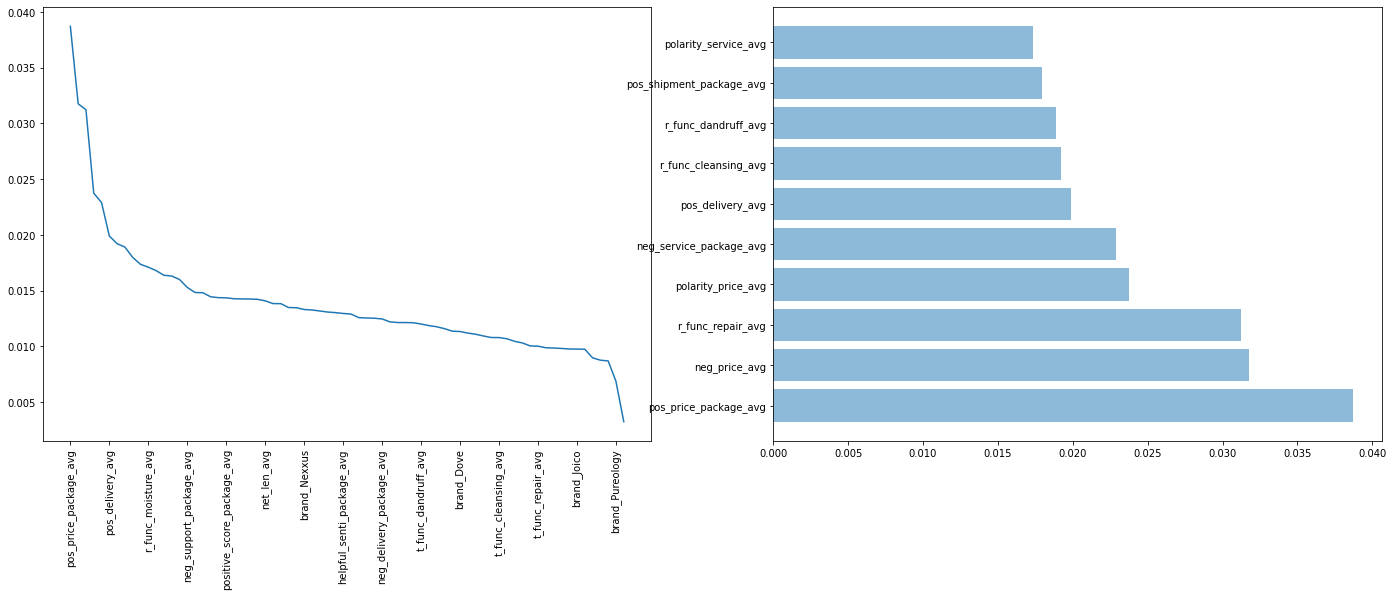

In [63]:
def plot_feature_importance(fi):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24,8))
    ax1.plot(np.arange(0, len(fi.index)), fi['importance'])
    label_nrs = np.arange(0, len(fi.index), 5 )
    ax1.set_xticks(label_nrs)
    ax1.set_xticklabels(fi['feature'][label_nrs], rotation=90)
    
    num_bar = min(len(fi.index), 10)
    ax2.barh(np.arange(0, num_bar), fi['importance'][:num_bar], align='center', alpha=0.5)
    ax2.set_yticks(np.arange(0, num_bar))
    ax2.set_yticklabels(fi['feature'][:num_bar])

plot_feature_importance(fi)